In [362]:
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

In [363]:
raw_results = pd.read_csv('results.csv', sep=';')

In [364]:
raw_results.head()

,Fylkenummer,Fylkenavn,Kommunenummer,Kommunenavn,Stemmekretsnummer,Stemmekretsnavn,Partikode,Partinavn,Oppslutning prosentvis,Antall stemmeberettigede,Antall forhåndsstemmer,Antall valgtingstemmer,Antall stemmer totalt,Endring % siste tilsvarende valg,Endring % siste ekvivalente valg,Antall mandater,Antall utjevningsmandater,Unnamed: 17
0,3,Oslo,301,Oslo,NaN,NaN,A,Arbeiderpartiet,"23,03733",485656,49021,36236,85257,"-5,317","3,0295",NaN,NaN,NaN
1,3,Oslo,301,Oslo,NaN,NaN,SV,SV - Sosialistisk Venstreparti,"13,28922",485656,31614,17567,49181,"4,0133","4,18908",NaN,NaN,NaN
2,3,Oslo,301,Oslo,NaN,NaN,RØDT,Rødt,"8,27735",485656,19611,11022,30633,"1,98944","1,08054",NaN,NaN,NaN
3,3,Oslo,301,Oslo,NaN,NaN,SP,Senterpartiet,"3,1112",485656,6668,4846,11514,"0,99244","0,92769",NaN,NaN,NaN
4,3,Oslo,301,Oslo,NaN,NaN,KRF,Kristelig Folkeparti,"1,80987",485656,4007,2691,6698,"-0,3266","0,07346",NaN,NaN,NaN


In [365]:
akershus_results = raw_results[raw_results['Fylkenavn'] == 'Akershus']

In [366]:
eidsvoll_results = akershus_results[akershus_results['Kommunenavn'] == 'Eidsvoll']

In [367]:
sp_akershus = akershus_results[akershus_results['Partikode'] == 'SP']

In [368]:
sp_akershus_focus = sp_akershus[['Kommunenavn', 'Oppslutning prosentvis', 'Antall stemmer totalt', 'Endring % siste tilsvarende valg']]

In [369]:
sp_akershus_focus

,Kommunenavn,Oppslutning prosentvis,Antall stemmer totalt,Endring % siste tilsvarende valg
2100,Vestby,"9,8166",926,"3,23363"
2121,Nordre Follo,"5,73645",1871,"1,74512"
2142,Ås,"10,97298",1121,"2,96668"
2163,Frogn,"6,74663",630,"2,19832"
2184,Nesodden,"4,85621",537,"1,40887"
2205,Bærum,"2,9584",2046,"0,78436"
2226,Asker,"5,85406",2945,"2,17422"
2247,Aurskog -Høland,"25,87785",2432,"8,11657"
2268,Rælingen,"7,9868",726,"3,07838"
2289,Enebakk,"16,24909",895,"4,03405"


In [370]:
øvre_romerike = ['Eidsvoll', 'Hurdal', 'Nannestad', 'Ullensaker', 'Gjerdrum', 'Nes']
nedre_romerike = ['Lillestrøm', 'Lørenskog', 'Nittedal', 'Rælingen', 'Aurskog -Høland']
follo = ['Nordre Follo', 'Nesodden', 'Frogn', 'Vestby', 'Ås', 'Enebakk']
asker_bærum = ['Asker', 'Bærum']
lunner = ['Lunner']

districts = øvre_romerike, nedre_romerike, follo, asker_bærum, lunner

In [371]:
øvre_romerike_df = pd.DataFrame(øvre_romerike)
øvre_romerike_df['district'] = 'Øvre Romerike'
øvre_romerike_df = øvre_romerike_df.rename(columns={0: 'Kommunenavn'})

nedre_romerike_df = pd.DataFrame(nedre_romerike)
nedre_romerike_df['district'] = 'Nedre Romerike'
nedre_romerike_df = nedre_romerike_df.rename(columns={0: 'Kommunenavn'})

follo_df = pd.DataFrame(follo)
follo_df['district'] = 'Follo'
follo_df = follo_df.rename(columns={0: 'Kommunenavn'})

asker_bærum_df = pd.DataFrame(asker_bærum)
asker_bærum_df['district'] = 'Asker-Bærum'
asker_bærum_df = asker_bærum_df.rename(columns={0: 'Kommunenavn'})

lunner_df = pd.DataFrame(lunner)
lunner_df['district'] = 'Lunner'
lunner_df = lunner_df.rename(columns={0: 'Kommunenavn'})

district_frames = [øvre_romerike_df, nedre_romerike_df, follo_df, asker_bærum_df, lunner_df]
district_df = pd.concat(district_frames)
district_df

sp_akershus_focus_districts = sp_akershus_focus.set_index('Kommunenavn').join(district_df.set_index('Kommunenavn'), lsuffix='', rsuffix='_d')
sp_akershus_focus_districts


,Oppslutning prosentvis,Antall stemmer totalt,Endring % siste tilsvarende valg,district
Kommunenavn,,,,
Vestby,"9,8166",926,"3,23363",Follo
Nordre Follo,"5,73645",1871,"1,74512",Follo
Ås,"10,97298",1121,"2,96668",Follo
Frogn,"6,74663",630,"2,19832",Follo
Nesodden,"4,85621",537,"1,40887",Follo
Bærum,"2,9584",2046,"0,78436",Asker-Bærum
Asker,"5,85406",2945,"2,17422",Asker-Bærum
Aurskog -Høland,"25,87785",2432,"8,11657",Nedre Romerike
Rælingen,"7,9868",726,"3,07838",Nedre Romerike


In [372]:
sp_akershus_focus_districts = sp_akershus_focus_districts.sort_values(by=['Endring % siste tilsvarende valg'], ascending=False)

In [373]:
sp_akershus_focus_districts = sp_akershus_focus_districts.rename(columns={'Endring % siste tilsvarende valg': 'Endring', 'Antall stemmer totalt': 'ant_stem', 'Oppslutning prosentvis': 'Oppslutning_prosentvis'})


In [374]:
sp_akershus_focus_districts.dtypes
#sp_akershus_focus_districts.groupby('district').Endring.mean()

#plt.figure();
#sp_akershus_focus_districts.plot(kind="bar")

Oppslutning_prosentvis    object
ant_stem                   int64
Endring                   object
district                  object
dtype: object

In [375]:
#sp_akershus_focus_districts['Endring'] = sp_akershus_focus_districts['Endring'].replace(',', '.')
#sp_akershus_focus_districts['Endring']


sp_akershus_focus_districts['Endring'] = sp_akershus_focus_districts['Endring'].str.replace(',', '.').astype(float)

sp_akershus_focus_districts['Endring'].apply(pd.to_numeric) 

#sp_akershus_focus_districts['Endring'] = pd.to_numeric(sp_akershus_focus_districts['Endring'])

Kommunenavn
Aurskog -Høland    8.11657
Lunner             7.28389
Nes                7.12410
Hurdal             6.24220
Nannestad          5.91998
Eidsvoll           5.07301
Lillestrøm         4.15609
Enebakk            4.03405
Nittedal           3.58542
Ullensaker         3.50778
Gjerdrum           3.25918
Vestby             3.23363
Rælingen           3.07838
Ås                 2.96668
Lørenskog          2.79516
Frogn              2.19832
Asker              2.17422
Nordre Follo       1.74512
Nesodden           1.40887
Bærum              0.78436
Name: Endring, dtype: float64

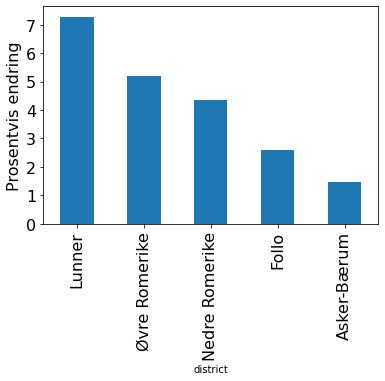

In [379]:
district_avg = sp_akershus_focus_districts.groupby('district').Endring.mean().sort_values(ascending=False)
district_avg

plt.figure();
#district_avg.plot(kind="bar", ylabel='% endring')
percent_endring_district = district_avg.plot.bar(x='Kommunenavn', y='Endring', rot=0, fontsize=16)
percent_endring_district.set_ylabel('Prosentvis endring', fontsize=16)
plt.xticks(rotation=90)
plt.savefig("percent_endring_district.jpeg", bbox_inches='tight')

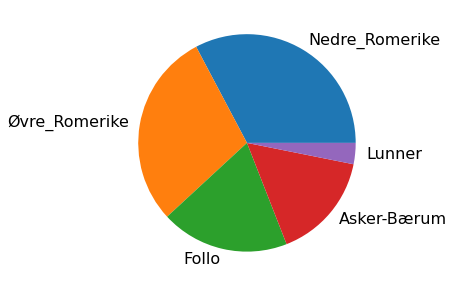

In [345]:
vote_share_df = sp_akershus_focus_districts.groupby('district').ant_stem.sum().sort_values(ascending=False)
vote_share = vote_share_df.plot.pie(y='mass', figsize=(5, 5), fontsize=16)
vote_share.set_ylabel('')
#plt.savefig("vote_share.pdf", bbox_inches='tight')

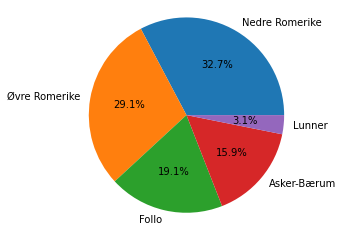

<Figure size 432x288 with 0 Axes>

In [382]:
labels = ['Nedre Romerike', 'Øvre Romerike', 'Follo', 'Asker-Bærum', 'Lunner']
plt.pie(vote_share_df, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()
plt.savefig("vote_share.jpeg", bbox_inches='tight')

In [312]:
vote_share_df

district
Nedre_Romerike    10270
Øvre_Romerike      9138
Follo              5980
Asker-Bærum        4991
Lunner              988
Name: ant_stem, dtype: int64

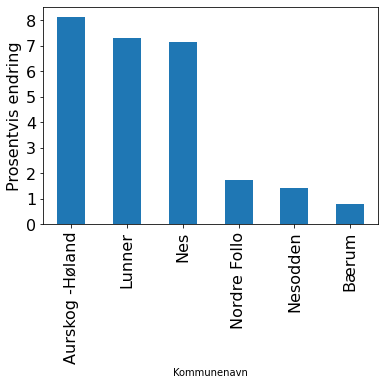

In [348]:
top_kommune = sp_akershus_focus_districts.Endring.nlargest(3)
top_kommune
bottom_kommune = sp_akershus_focus_districts.Endring.nsmallest(3).sort_values(ascending=False)
bottom_kommune

kommune_con = pd.concat([top_kommune, bottom_kommune])
topp3bottom3 = kommune_con.plot.bar(x='Kommunenavn', y='Endring', rot=0, fontsize=16)
plt.xticks(rotation=90)
topp3bottom3.set_ylabel('Prosentvis endring', fontsize=16)
plt.savefig("topp3bottom3.jpeg", bbox_inches='tight')

In [329]:
sp_akershus_focus_districts['Oppslutning_prosentvis'] = sp_akershus_focus_districts['Oppslutning_prosentvis'].str.replace(',', '.').astype(float)

sp_akershus_focus_districts['Oppslutning_prosentvis'].apply(pd.to_numeric)

AttributeError: Can only use .str accessor with string values!

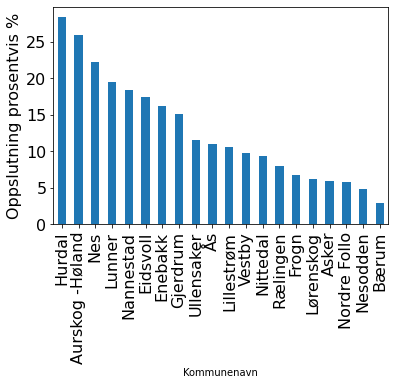

In [347]:
Oppslutning_prosentvis_vis = sp_akershus_focus_districts.Oppslutning_prosentvis.sort_values(ascending=False)
Oppslutning_prosentvis_vis.plot.bar(x='Kommunenavn', y='Endring', rot=0, fontsize=16)
plt.ylabel('Oppslutning prosentvis %', fontsize=16)
plt.xticks(rotation=90)
plt.savefig("Oppslutning_prosentvis.jpeg", bbox_inches='tight')